In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

file_path = "Unemployment in India.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "gokulrajkmv/unemployment-in-india",
    file_path,
)
print("Dataset loaded successfully!\n")
print(df.head())


/tmp/ipython-input-1212382340.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 45.9k/45.9k [00:00<00:00, 26.0MB/s]

Dataset loaded successfully!

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"

## shape of the Data

In [ ]:
df.shape

(768, 7)

## View all Columns of Data

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# View duplicated Data

In [ ]:
df.duplicated().sum()

np.int64(27)

# Remove Duplicated Data

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# View Null values

In [ ]:
print(df.isnull().sum())


Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64


# Remove Null values

In [ ]:
df=df.dropna()
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


# View all Information about Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


# Observation

Our dataset contains 7 columns and 740 rows.

The dataset currently shows 4 columns as object type (Region, Date, Frequency, and Area).
The columns Estimated Unemployment Rate (%), Estimated Employed, and Estimated Labour Participation Rate (%) are correctly stored as float64.

The Date column is still of type object, and should be converted to datetime64[ns] for time-series analysis.
Therefore, the next step is to convert the Date column into datetime format to ensure accurate trend and seasonal analysis.

# Data Cleaning

In [ ]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
df[' Frequency'] = df[' Frequency'].str.strip()

In [ ]:
df[' Date'] = pd.to_datetime(df[' Date'])

In [ ]:
df[' Estimated Employed'] = df[' Estimated Employed'].astype(int)

# Feature engineering

In [ ]:
df[' Date'] = pd.to_datetime(df[' Date'], errors='coerce')


df['year'] = df[' Date'].dt.year
df['month'] = df[' Date'].dt.month


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,2019,9


# Exploratory Data Analysis (EDA)

To structure our analysis, we categorized the dataset columns into categorical, numerical, and datetime types:

 Categorical Columns

*   Region
*   Month
*   Year
*  Month
*   Frequency
*  Area

 Numerical Columns

*   Estimated Employed
*  Estimated Unemployment Rate (%)
*  Estimated Labour Participation Rate (%)


  Datetime Column
*   Date




###  descriptive statistics

In [ ]:
print("\n Descriptive Statistics:")
print(df.describe())



 Descriptive Statistics:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                    

# Categorical Columns

## How are values distributed in Categorical Columns?

In [ ]:
plt.style.use('seaborn-v0_8')


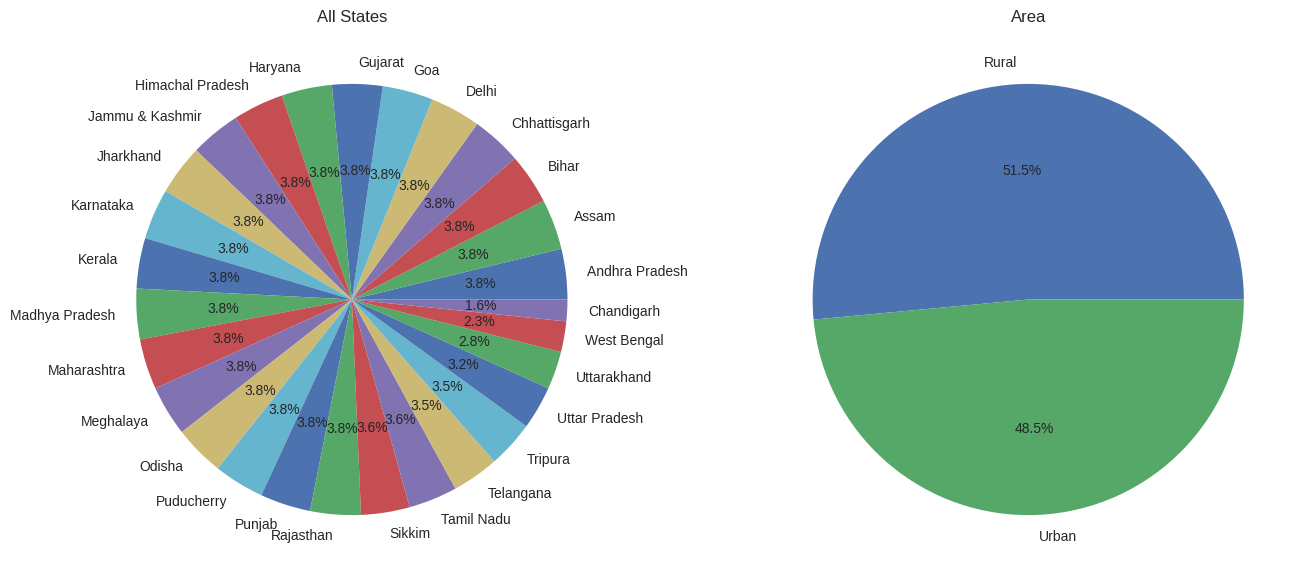

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

ax[0].pie(df['Region'].value_counts(), labels=df['Region'].unique(), autopct='%0.1f%%')
ax[1].pie(df['Area'].value_counts(), labels=df['Area'].unique(), autopct='%0.1f%%')
ax[0].set_title('All States')
ax[1].set_title('Area')

plt.show()

# Numerical Columns

## How are values distributed in Numerical Columns?

In [ ]:
plt.style.use('fivethirtyeight')

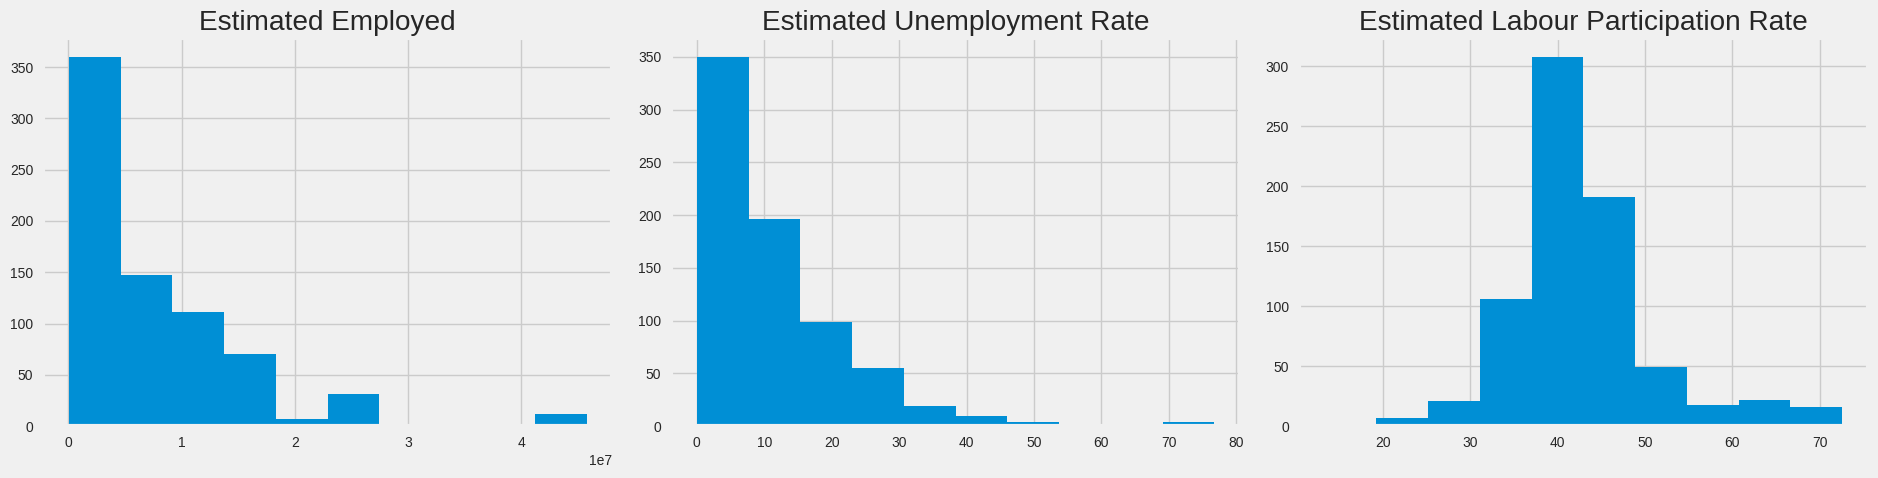

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 5))

ax[0].hist(df[' Estimated Employed'])
ax[1].hist(df[' Estimated Unemployment Rate (%)'])
ax[2].hist(df[' Estimated Labour Participation Rate (%)'])

ax[0].set_title('Estimated Employed')
ax[1].set_title('Estimated Unemployment Rate')
ax[2].set_title('Estimated Labour Participation Rate')

plt.tight_layout()
plt.show()

# Numerical vs Categorical

## Analysis by States


## How states were affected in Year 2020 and 2019?

In [ ]:
plt.style.use('Solarize_Light2')

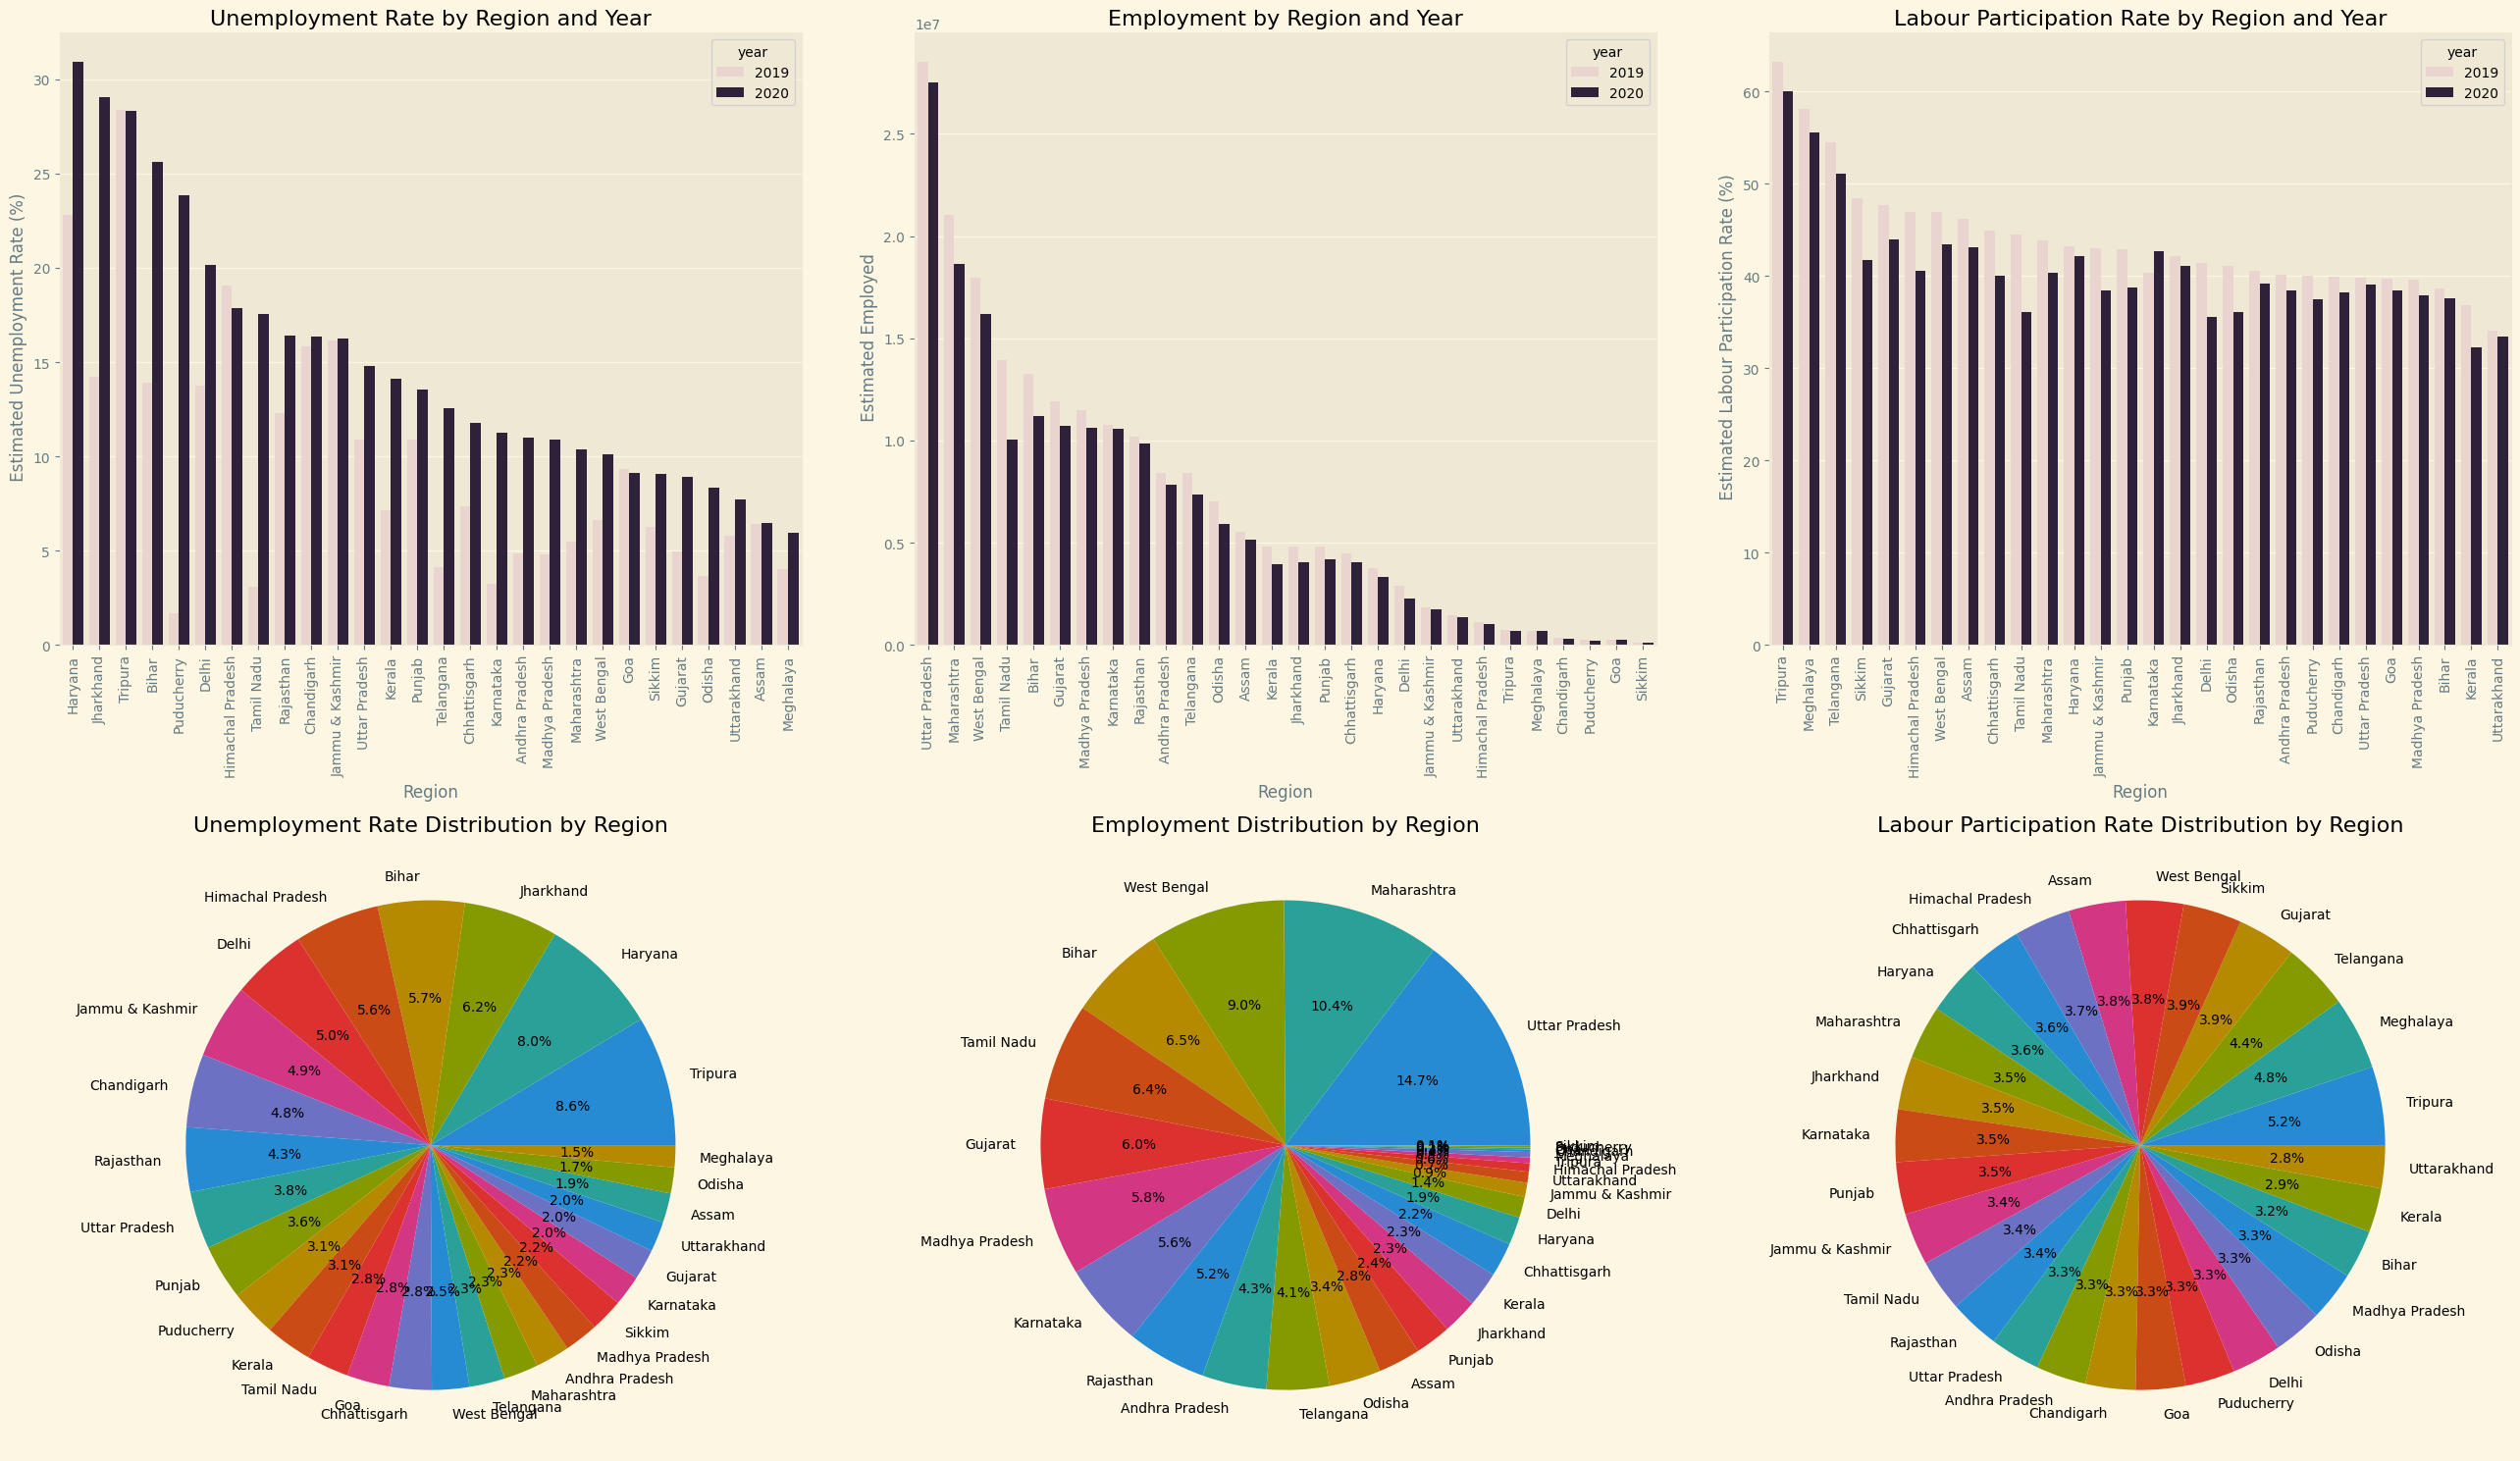

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 15))

sns.barplot(
    data=df.groupby(['Region', 'year'])[' Estimated Unemployment Rate (%)']
            .mean().sort_values(ascending=False).reset_index(),
    x='Region', y=' Estimated Unemployment Rate (%)', hue='year', ax=ax[0, 0]
)
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 0].set_xlabel('Region')
ax[0, 0].set_title('Unemployment Rate by Region and Year')
ax[1, 0].pie(
    df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False),
    labels=df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
           .sort_values(ascending=False).reset_index()['Region'],
    autopct='%0.1f%%'
)
ax[1, 0].set_title('Unemployment Rate Distribution by Region')

sns.barplot(
    data=df.groupby(['Region', 'year'])[' Estimated Employed']
            .mean().sort_values(ascending=False).reset_index(),
    x='Region', y=' Estimated Employed', hue='year', ax=ax[0, 1]
)
ax[0, 1].tick_params(axis='x', rotation=90)
ax[0, 1].set_xlabel('Region')
ax[0, 1].set_title('Employment by Region and Year')
ax[1, 1].pie(
    df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False),
    labels=df.groupby('Region')[' Estimated Employed'].mean()
           .sort_values(ascending=False).reset_index()['Region'],
    autopct='%0.1f%%'
)
ax[1, 1].set_title('Employment Distribution by Region')


sns.barplot(
    data=df.groupby(['Region', 'year'])[' Estimated Labour Participation Rate (%)']
            .mean().sort_values(ascending=False).reset_index(),
    x='Region', y=' Estimated Labour Participation Rate (%)', hue='year', ax=ax[0, 2]
)
ax[0, 2].tick_params(axis='x', rotation=90)
ax[0, 2].set_xlabel('Region')
ax[0, 2].set_title('Labour Participation Rate by Region and Year')
ax[1, 2].pie(
    df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False),
    labels=df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean()
           .sort_values(ascending=False).reset_index()['Region'],
    autopct='%0.1f%%'
)
ax[1, 2].set_title('Labour Participation Rate Distribution by Region')

plt.tight_layout()
plt.show()

# Bivariate Analysis (Region vs Year)

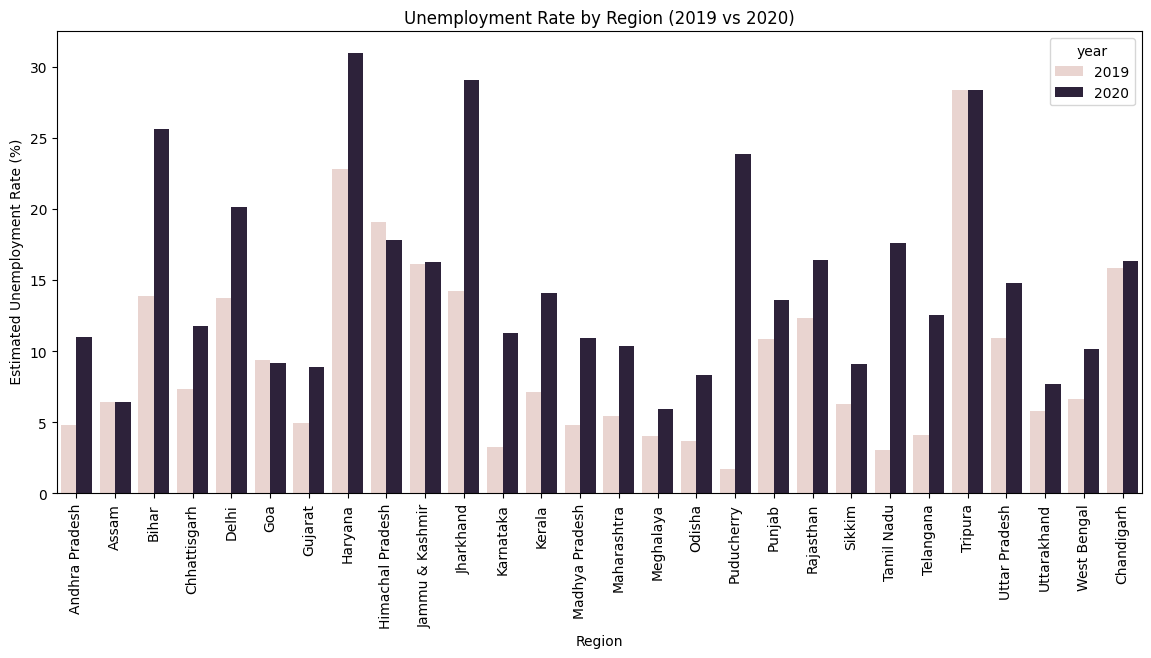

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Region', y='estimated_unemployment_rate_(%)', hue='year', ci=None)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region (2019 vs 2020)')
plt.show()

# COVID-19 Impact

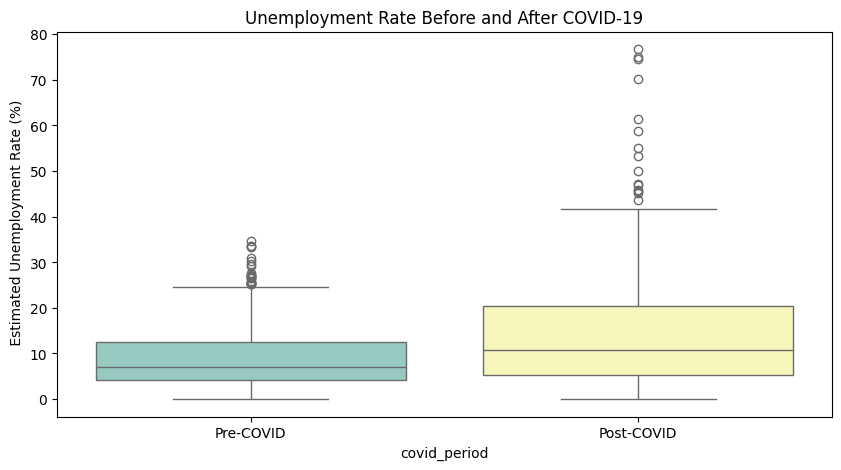


Average Unemployment Rate:
 covid_period
Post-COVID    15.101581
Pre-COVID      9.399047
Name:  Estimated Unemployment Rate (%), dtype: float64


In [ ]:
df['covid_period'] = df['year'].apply(lambda x: 'Post-COVID' if x >= 2020 else 'Pre-COVID')

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='covid_period', y=' Estimated Unemployment Rate (%)', palette="Set3")
plt.title('Unemployment Rate Before and After COVID-19')
plt.show()

covid_impact = df.groupby('covid_period')[' Estimated Unemployment Rate (%)'].mean()
print("\nAverage Unemployment Rate:\n", covid_impact)

# Average Unemployment Rate by Month

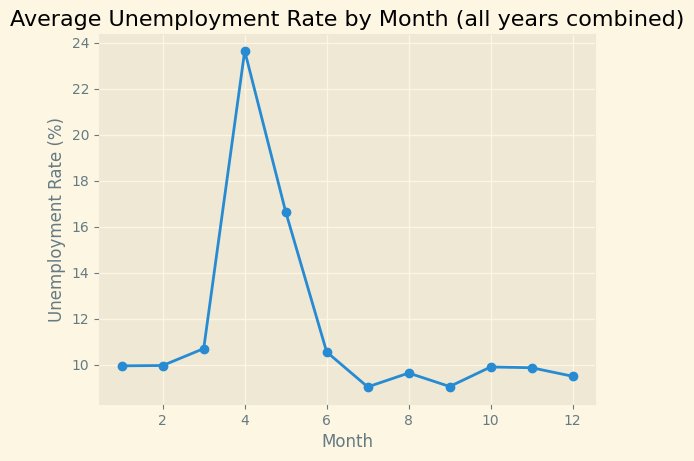

In [ ]:
monthly = df.groupby('month')[' Estimated Unemployment Rate (%)'].mean().reindex(range(1,13))
plt.figure()
monthly.plot(marker='o')
plt.title("Average Unemployment Rate by Month (all years combined)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

# How states were affected in Year 2020 and 2019?

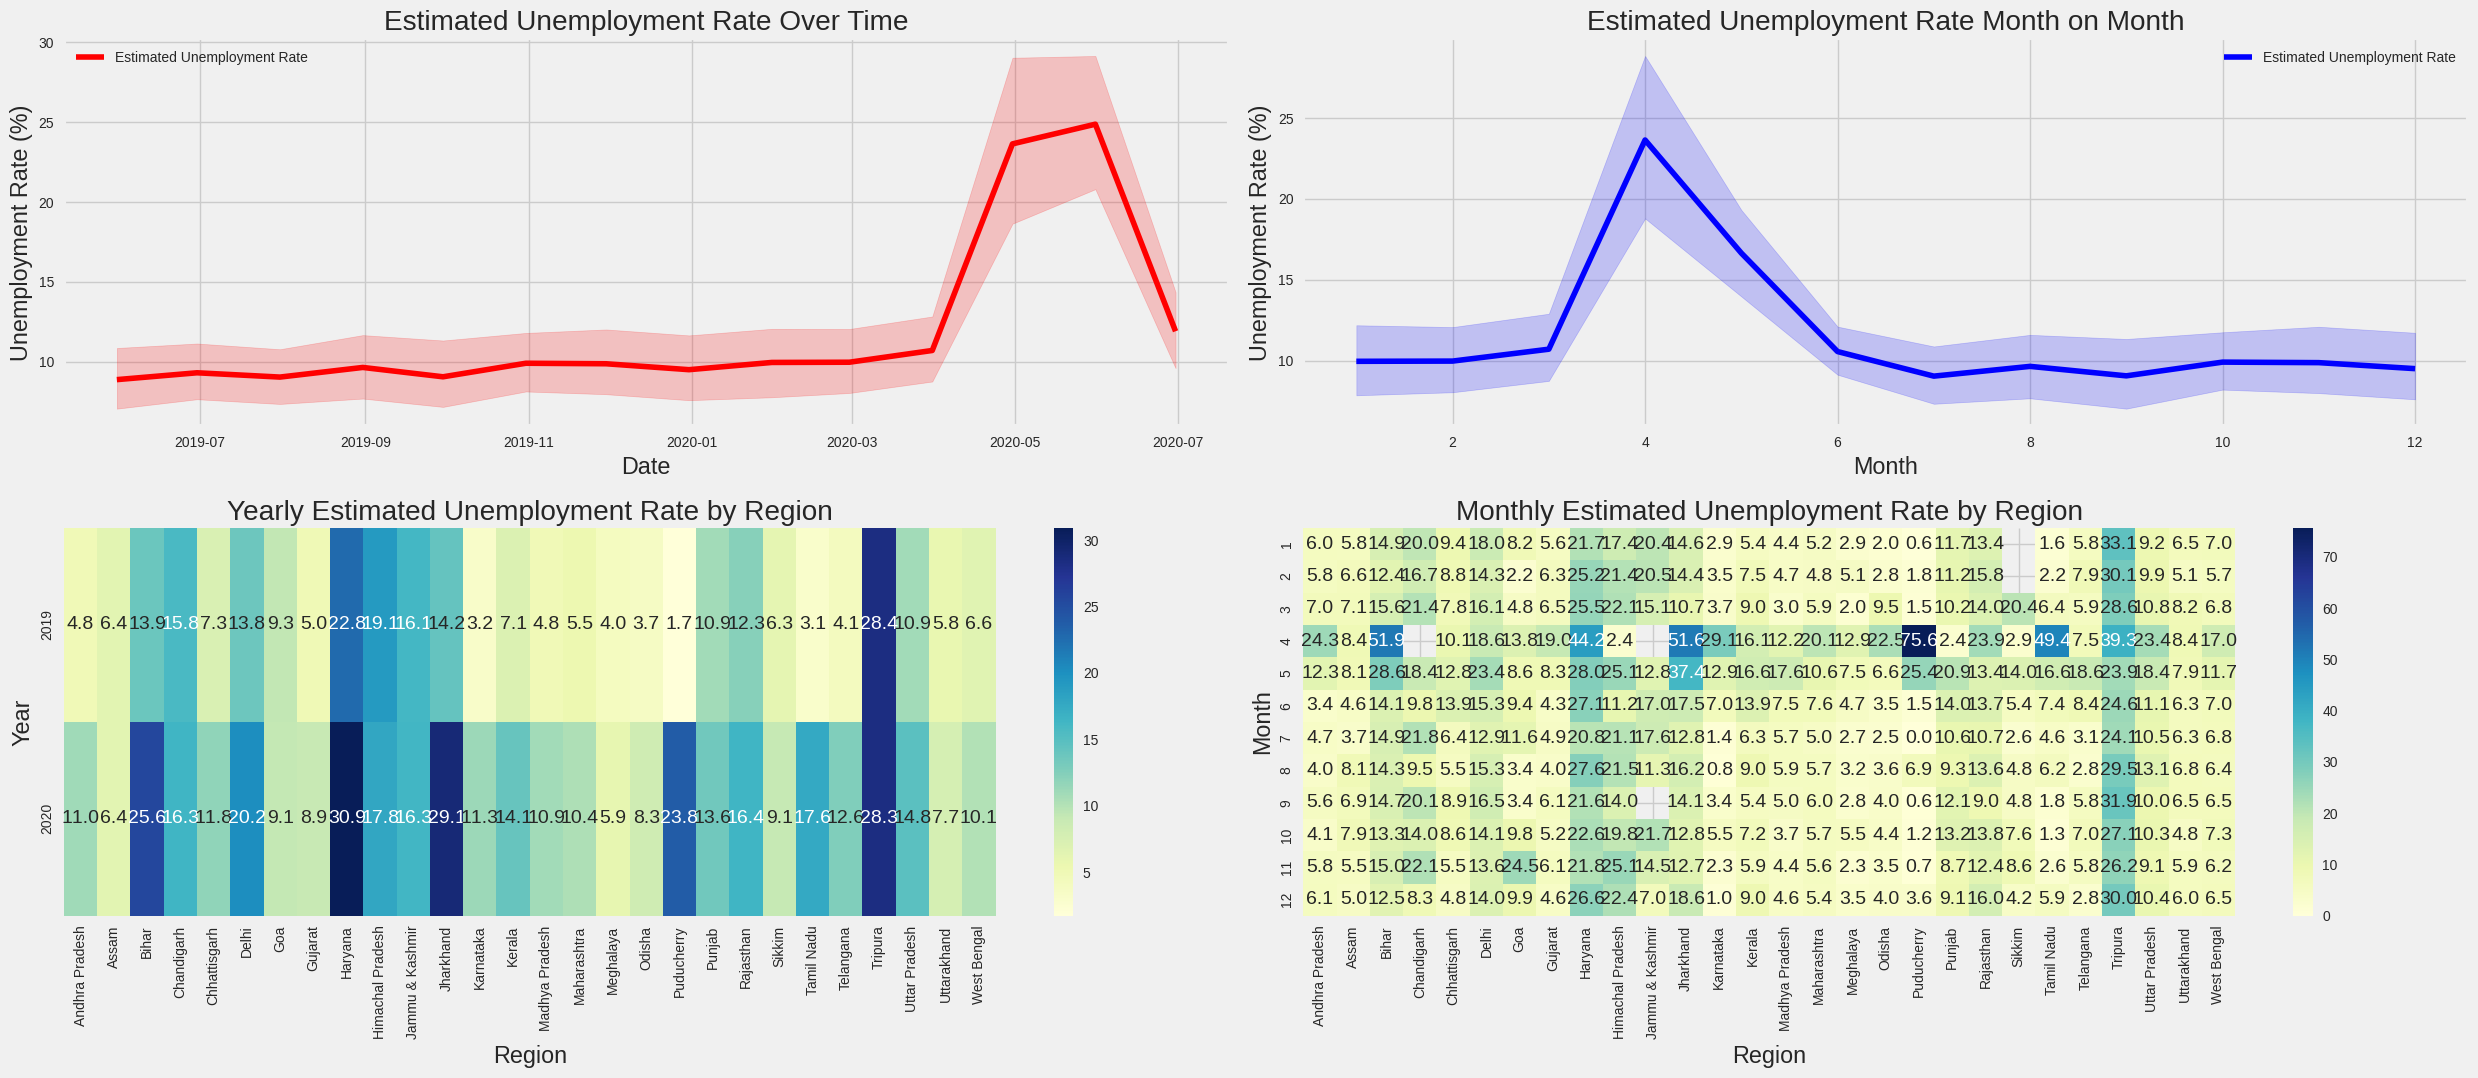

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,11))


sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)', ax=ax[0,0], label='Estimated Unemployment Rate', color='red')
ax[0,0].set_title('Estimated Unemployment Rate Over Time')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Unemployment Rate (%)')
ax[0,0].legend()
ax[0,0].grid(True)

sns.lineplot(data=df, x='month', y=' Estimated Unemployment Rate (%)', ax=ax[0,1], label='Estimated Unemployment Rate', color='blue')
ax[0,1].set_title('Estimated Unemployment Rate Month on Month')
ax[0,1].set_xlabel('Month')
ax[0,1].set_ylabel('Unemployment Rate (%)')
ax[0,1].legend()
ax[0,1].grid(True)


monthly = df.pivot_table(index='month', columns='Region', values=' Estimated Unemployment Rate (%)')
sns.heatmap(monthly, ax=ax[1,1], cmap="YlGnBu", annot=True, fmt=".1f")
ax[1,1].set_title('Monthly Estimated Unemployment Rate by Region')
ax[1,1].set_xlabel('Region')
ax[1,1].set_ylabel('Month')


yearly = df.pivot_table(index='year', columns='Region', values=' Estimated Unemployment Rate (%)')
sns.heatmap(yearly, ax=ax[1,0], cmap="YlGnBu", annot=True, fmt=".1f")
ax[1,0].set_title('Yearly Estimated Unemployment Rate by Region')
ax[1,0].set_xlabel('Region')
ax[1,0].set_ylabel('Year')

plt.tight_layout()
plt.show()

# Conclusion & Insights

This analysis of unemployment trends in India across different regions and time periods provides valuable insights into the country’s labor market during and after the Covid-19 lockdown:

1. Unemployment Rate (UR):

The unemployment rate increased significantly during 2020, clearly reflecting the economic impact of Covid-19 restrictions.

The spike was most noticeable between April and June 2020, the peak lockdown period.

After mid-2020, a gradual decline was observed as economic activities resumed.

2. Employment Rate (ER):

The employment rate showed a sharp decline during the lockdown period, inversely following the unemployment trend.

Post-lockdown recovery varied across regions, with some showing faster improvement than others.

3. Labour Participation Rate (LPR):

The labour participation rate remained relatively stable overall but showed temporary drops during strict lockdown phases.

This indicates that some workers exited the labour market temporarily due to restrictions or lack of opportunities.

4. Regional Differences:

Regions such as the East and South were more affected, showing larger fluctuations in unemployment.

The North and West regions displayed more stability and quicker recovery.

These differences suggest variations in industrial composition and local policy responses.

5. Overall Insights:

Covid-19 had a major short-term impact on India’s employment structure, increasing unemployment and reducing participation.

However, signs of recovery appeared soon after restrictions were lifted, indicating the resilience of certain sectors.

Understanding these regional and temporal trends can help policymakers design more targeted employment and recovery strategies.